In [1]:
!pip install imageio matplotlib numpy


<ipython-input-2-a9b242ef7e49>:15: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread('/content/022283400_1504951758-kambingcov.jpg')


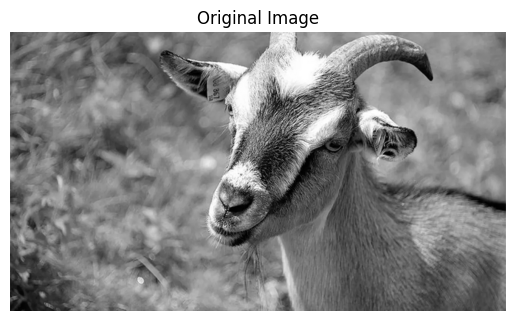

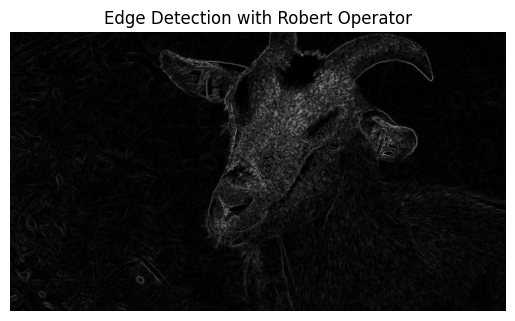

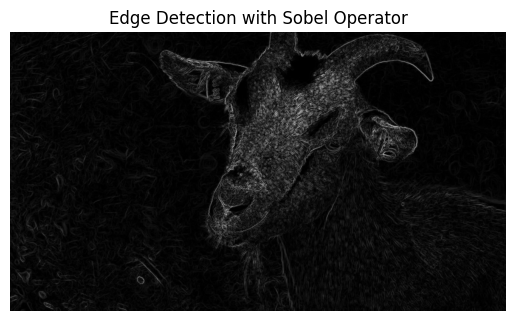

Analisis:
1. Operator Robert lebih sensitif terhadap perubahan tepi yang tajam dan memberikan hasil yang lebih kasar.
2. Operator Sobel cenderung memberikan hasil yang lebih halus dan lebih cocok untuk mendeteksi tepi yang lebih jelas.
3. Sobel menghasilkan deteksi tepi yang lebih halus karena menggabungkan informasi dari 3x3 kernel dibandingkan dengan 2x2 pada Robert.


In [2]:
# Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import imageio
from scipy.ndimage import convolve

# Fungsi untuk menampilkan gambar
def show_image(image, title="Image"):
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Load gambar menggunakan imageio
image = imageio.imread('/content/022283400_1504951758-kambingcov.jpg')

# Konversi gambar ke grayscale
if len(image.shape) == 3:
    image = np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])  # Konversi ke grayscale

# Tampilkan gambar asli
show_image(image, "Original Image")

# Operator Robert untuk deteksi tepi
robert_x = np.array([[1, 0], [0, -1]])  # Operator Robert untuk arah X
robert_y = np.array([[0, 1], [-1, 0]])  # Operator Robert untuk arah Y

# Konvolusi dengan operator Robert
edge_robert_x = convolve(image, robert_x)
edge_robert_y = convolve(image, robert_y)
edge_robert = np.hypot(edge_robert_x, edge_robert_y)  # Gabungkan hasil konvolusi X dan Y

# Tampilkan hasil deteksi tepi dengan operator Robert
show_image(edge_robert, "Edge Detection with Robert Operator")

# Operator Sobel untuk deteksi tepi
sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])  # Operator Sobel untuk arah X
sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])  # Operator Sobel untuk arah Y

# Konvolusi dengan operator Sobel
edge_sobel_x = convolve(image, sobel_x)
edge_sobel_y = convolve(image, sobel_y)
edge_sobel = np.hypot(edge_sobel_x, edge_sobel_y)  # Gabungkan hasil konvolusi X dan Y

# Tampilkan hasil deteksi tepi dengan operator Sobel
show_image(edge_sobel, "Edge Detection with Sobel Operator")

# Analisis perbandingan antara hasil deteksi tepi Robert dan Sobel
print("Analisis:")
print("1. Operator Robert lebih sensitif terhadap perubahan tepi yang tajam dan memberikan hasil yang lebih kasar.")
print("2. Operator Sobel cenderung memberikan hasil yang lebih halus dan lebih cocok untuk mendeteksi tepi yang lebih jelas.")
print("3. Sobel menghasilkan deteksi tepi yang lebih halus karena menggabungkan informasi dari 3x3 kernel dibandingkan dengan 2x2 pada Robert.")
